In [1]:
from Learners import GreedyLearner
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(5)
plt.style.use('seaborn-v0_8')


In [2]:
initial_value = 0
epsilon = 0.1
alpha = 0.1

stdev = 0.01


num_arms = 10
rounds = 10_000
num_tests = 2_000


In [3]:
learners = [(GreedyLearner, {'rounds': rounds, 'num_arms': num_arms, 'initial_value': initial_value,
                             'epsilon': epsilon}),
            (GreedyLearner, {'rounds': rounds, 'num_arms': num_arms, 'initial_value': initial_value,
                             'epsilon': epsilon, 'alpha': alpha})
            ]
scores = [np.empty((num_tests, rounds)) for _ in range(len(learners))]
regret = [np.empty((num_tests, rounds)) for _ in range(len(learners))]


for i in range(num_tests):

    normals = np.random.normal(size=(rounds, num_arms), scale=stdev)
    normals[0] = np.zeros(num_arms)

    testbed_means = np.cumsum(normals, axis=0)
    testbed = np.random.normal(loc=testbed_means, size=(rounds, num_arms))

    for idx, (learner_class, kwargs) in enumerate(learners):

        learner = learner_class(
            testbed=testbed, testbed_means=testbed_means, **kwargs)
        learner.learn()
        scores[idx][i] = learner.rewards
        regret[idx][i] = learner.regret


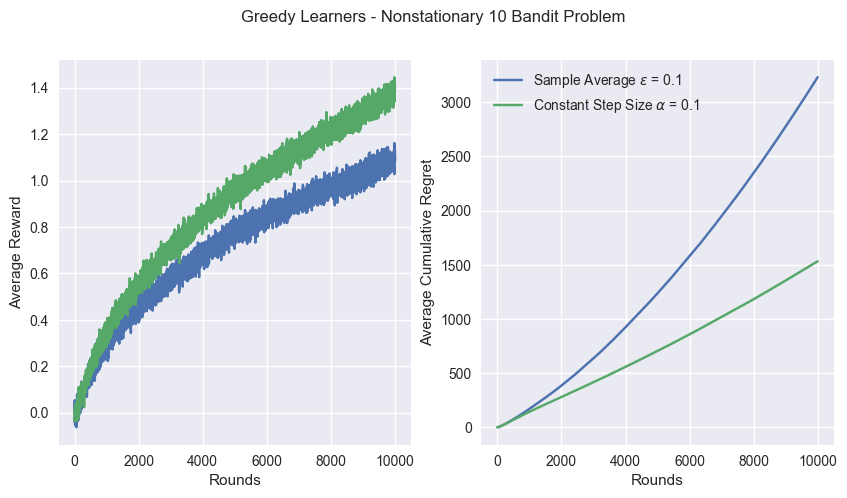

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax, ax2 = axs

for idx, learner in enumerate([rf'Sample Average $\epsilon$ = {epsilon}', rf'Constant Step Size $\alpha$ = {alpha}']):
    ax.plot(np.mean(scores[idx], axis=0), label=learner)
    ax2.plot(np.cumsum(regret[idx], axis=1).mean(axis=0), label=learner)

plt.suptitle(f'Greedy Learners - Nonstationary {num_arms} Bandit Problem')

ax.set_ylabel('Average Reward')
ax2.set_ylabel('Average Cumulative Regret')
ax.set_xlabel('Rounds')
ax2.set_xlabel('Rounds')

plt.legend()
plt.savefig('../../plots/q2/f.png', dpi=300)

plt.show()
